# TRABAJO NUMERO 2
----
# Precios de propiedades de alquiler en la ciudad de Nueva York.
* ## En este proyecto tengo pensado hacer un análisis exploratorio en general.
* ## tambien elegi este tipo de datasets por que se puede usar varios modelos predictivos en general.
* ## la base de datos fue extraida de http://www.kaggle.com
-----
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-
* ## Podremos contestar las siguientes preguntas :
    * ### Barrio "mas caro".
    * ### Clasificar los tipo de habitación en función a sus caracteristicas.
    * ### Determinar el precio que puede costar segun su habitación y ubicación. ******
    * ### Podriamos agrupar basados en las caracteristicas que tengamos de precios ******

In [1]:
import pandas as pd
import numpy as np
## ## ##
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Cargamos el dataset y vemos que tipos de contenido los compone
data = pd.read_csv("./NY Realstate Pricing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   F1                     17614 non-null  int64  
 1   id                     17614 non-null  int64  
 2   neighbourhood          17614 non-null  object 
 3   latitude               17614 non-null  float64
 4   longitude              17614 non-null  float64
 5   room_type              17614 non-null  object 
 6   price                  17614 non-null  int64  
 7   days_occupied_in_2019  17614 non-null  int64  
 8   minimum_nights         17614 non-null  int64  
 9   number_of_reviews      17614 non-null  int64  
 10  reviews_per_month      17614 non-null  float64
 11  availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


**Observación**
* Podemos ver que tenemos 17614 filas y 12 columnas


----
**Cambiaremos los nombres de las columnas para que sea mas legible**

In [3]:
data = data.rename(columns={"neighbourhood":"barrio", "latitude":"latitud","longitude":"longitud",
                           "room_type":"tipo_habitacion","price":"precio","days_occupied_in_2019":"dias_ocupados_2019",
                           "minimum_nights":"noches_minimas","number_of_reviews":"numeros_reseñas",
                           "reviews_per_month":"reseñas_por_mes","availability_2020":"disponibilidad_2020"})
data.head()

,F1,id,barrio,latitud,longitud,tipo_habitacion,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


In [4]:
data.describe()

,F1,id,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020
count,17614.000000,1.761400e+04,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000,17614.000000
mean,18547.564664,1.572032e+07,40.726755,-73.947732,145.455490,179.517656,7.392926,56.128988,1.607060,154.154763
std,11000.717341,9.644155e+06,0.056981,0.050213,194.990677,130.202015,19.233869,65.972370,1.635528,138.079651
min,0.000000,2.595000e+03,40.508680,-74.239860,0.000000,0.000000,1.000000,1.000000,0.010000,0.000000
25%,8192.250000,6.718288e+06,40.686042,-73.980938,70.000000,35.000000,2.000000,9.000000,0.340000,8.000000
50%,19496.500000,1.654699e+07,40.720540,-73.953050,109.000000,198.000000,3.000000,33.000000,1.060000,125.000000
75%,28686.750000,2.407707e+07,40.763127,-73.930682,170.000000,301.000000,5.000000,79.000000,2.460000,309.000000
max,35596.000000,3.056528e+07,40.908040,-73.721790,9999.000000,364.000000,1125.000000,675.000000,19.250000,365.000000


**Observación | - Hacemos una descripción sobre los datos numericos que contiene el dataset.**
* se puede ver que la **latitud media es 40.72 y la longitud -73.94**
    * Es decir en el barrio de **Williamsburg**
    * Ubicación en el google maps: https://goo.gl/maps/cde7bLuU46ViFQvM7
* **Precios de alquiler**. La media es de 145 usd aproximadamente (puede variar entre los 70usd y 170usd) segun zona y tipo de habitaciones. tengamos en cuenta que la mas cara es de 9999usd
* La media de **noche minimas** son de 7 (una semana).
* Los **numeros sobre las reseñas** va variando y son de 56 pero por una vista rapida no es un valor muy acertado, es mas 33 el numero de reseñas por dpto de al quiler.
* La minima de **dias alquilados en todo el 2019** por deptos es de 0 (por que obviamente hay algunos que no fueron alquilados). Pero esto no hay que tenerlo tan en cuenta ya que el impercentil de 25% es de 35 dias y la media de 180 en todo el 2019.
* Las **reseñas mensuales** tiene una media de 1.6 
* La media de **alquileres diarios disponibles en el 2020** fue de 155 dia disponibles.

-------
------

<AxesSubplot:xlabel='disponibilidad_2020', ylabel='Count'>

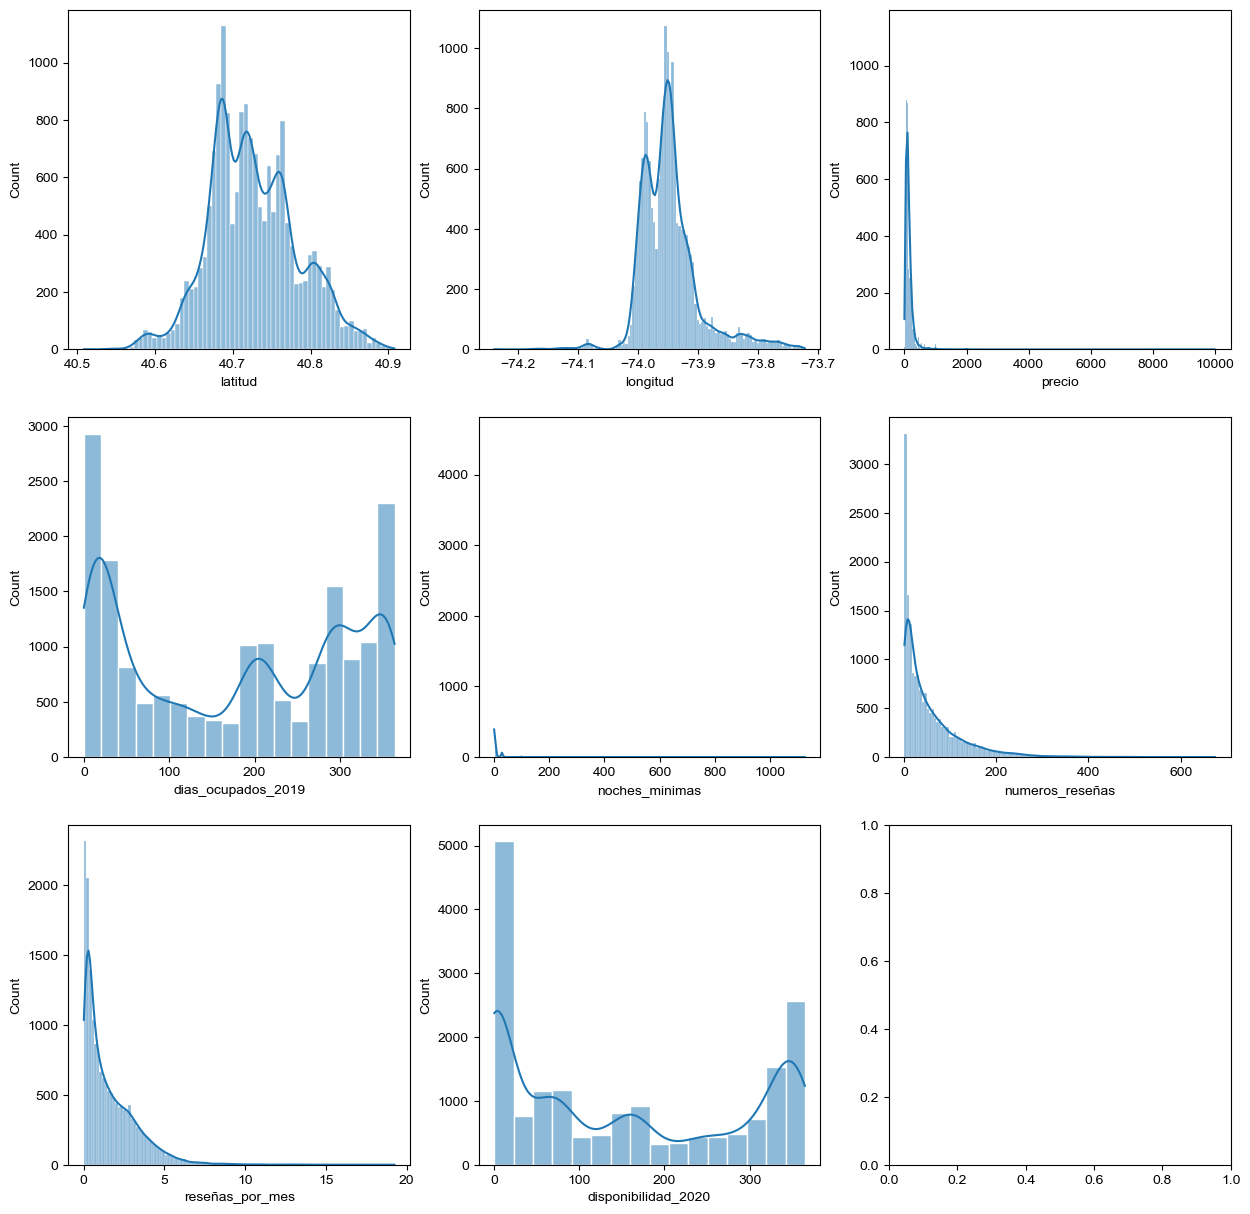

In [5]:
import seaborn as sns

#Creamos una series (subplot) de graficos para que esten todos juntos
fig,ax = plt.subplots(3,3,figsize=(15,15))
sns.set(font_scale =1)
sns.histplot(data['latitud'],kde=True,ax=ax[0,0])
sns.histplot(data['longitud'],kde=True,ax=ax[0,1])
sns.histplot(data['precio'],kde=True,ax=ax[0,2])
sns.histplot(data['dias_ocupados_2019'],kde=True,ax=ax[1,0])
sns.histplot(data['noches_minimas'],kde=True,ax=ax[1,1])
sns.histplot(data['numeros_reseñas'],kde=True,ax=ax[1,2])
sns.histplot(data['reseñas_por_mes'],kde=True,ax=ax[2,0])
sns.histplot(data['disponibilidad_2020'],kde=True,ax=ax[2,1])


**Creamos unos graficos para poder ver mejor como se comportan los datos y ver como van actuando.**

-----

# Conteo de si el data set tiene valores N/A

In [6]:
### Para ver si contiene  valores N/A
print(data.isna().sum())
### que nos diga cuantas filas y columnas componen el dataset
print(f"Numeros de filas{data.shape}columnas")

F1                     0
id                     0
barrio                 0
latitud                0
longitud               0
tipo_habitacion        0
precio                 0
dias_ocupados_2019     0
noches_minimas         0
numeros_reseñas        0
reseñas_por_mes        0
disponibilidad_2020    0
dtype: int64
Numeros de filas(17614, 12)columnas


----
# Hacemos un conteo de los tipos distintos de habitaciónes.

In [7]:
#Creamos un conteo para los distintos tipos de habitacion que contiene el Datasets
habitaciones = data["tipo_habitacion"].value_counts()
print("Cuantos y cuales son los tipos distintos de las habitaciones :\n")
for habitacion , cantidad in habitaciones.items():
    print(f"Tenemos la habitación de tipo {habitacion} con una cantidad de {cantidad}.")

Cuantos y cuales son los tipos distintos de las habitaciones :

Tenemos la habitación de tipo Entire home/apt con una cantidad de 9405.
Tenemos la habitación de tipo Private room con una cantidad de 7752.
Tenemos la habitación de tipo Shared room con una cantidad de 357.
Tenemos la habitación de tipo Hotel room con una cantidad de 100.


-------
# Conteo de los barrios.

In [8]:
#Conteo de los barrios. Creamos un bucle para que nos vaya contando e itarando por barrio y cantidad
barrios = data["barrio"].value_counts()
print("Conteo de lugares y sus respectivos barrios en Nueva Yotk:\n")
for barrio , cantidad in barrios.items():
    print(f"El barrio {barrio} se encuentran {cantidad} lugares para alquilar.")

Conteo de lugares y sus respectivos barrios en Nueva Yotk:

El barrio Brooklyn se encuentran 3875 lugares para alquilar.
El barrio Manhattan se encuentran 3229 lugares para alquilar.
El barrio Queens se encuentran 1099 lugares para alquilar.
El barrio Bedford-Stuyvesant se encuentran 799 lugares para alquilar.
El barrio Harlem se encuentran 632 lugares para alquilar.
El barrio Williamsburg se encuentran 615 lugares para alquilar.
El barrio Midtown se encuentran 430 lugares para alquilar.
El barrio Bushwick se encuentran 361 lugares para alquilar.
El barrio Upper West Side se encuentran 292 lugares para alquilar.
El barrio Upper East Side se encuentran 291 lugares para alquilar.
El barrio Crown Heights se encuentran 262 lugares para alquilar.
El barrio Astoria se encuentran 249 lugares para alquilar.
El barrio The Bronx se encuentran 247 lugares para alquilar.
El barrio East Village se encuentran 239 lugares para alquilar.
El barrio Hell's Kitchen se encuentran 213 lugares para alquilar

**Observación**
* Tenemos 186 barrios en toda la ciudad de NY
* Obtuvimos una lista muy extensa sobre los lugares de alquiler y sus respectivos barrios
    * Tengamos en cuenta que son 17614 filas u tipos de datos de alquileres en la ciudad de NY
    -----
  
# Miraremos la correlacion que tienen entre si las variables.

C:\Users\Acer\AppData\Local\Temp\ipykernel_16424\949936012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = data.corr()


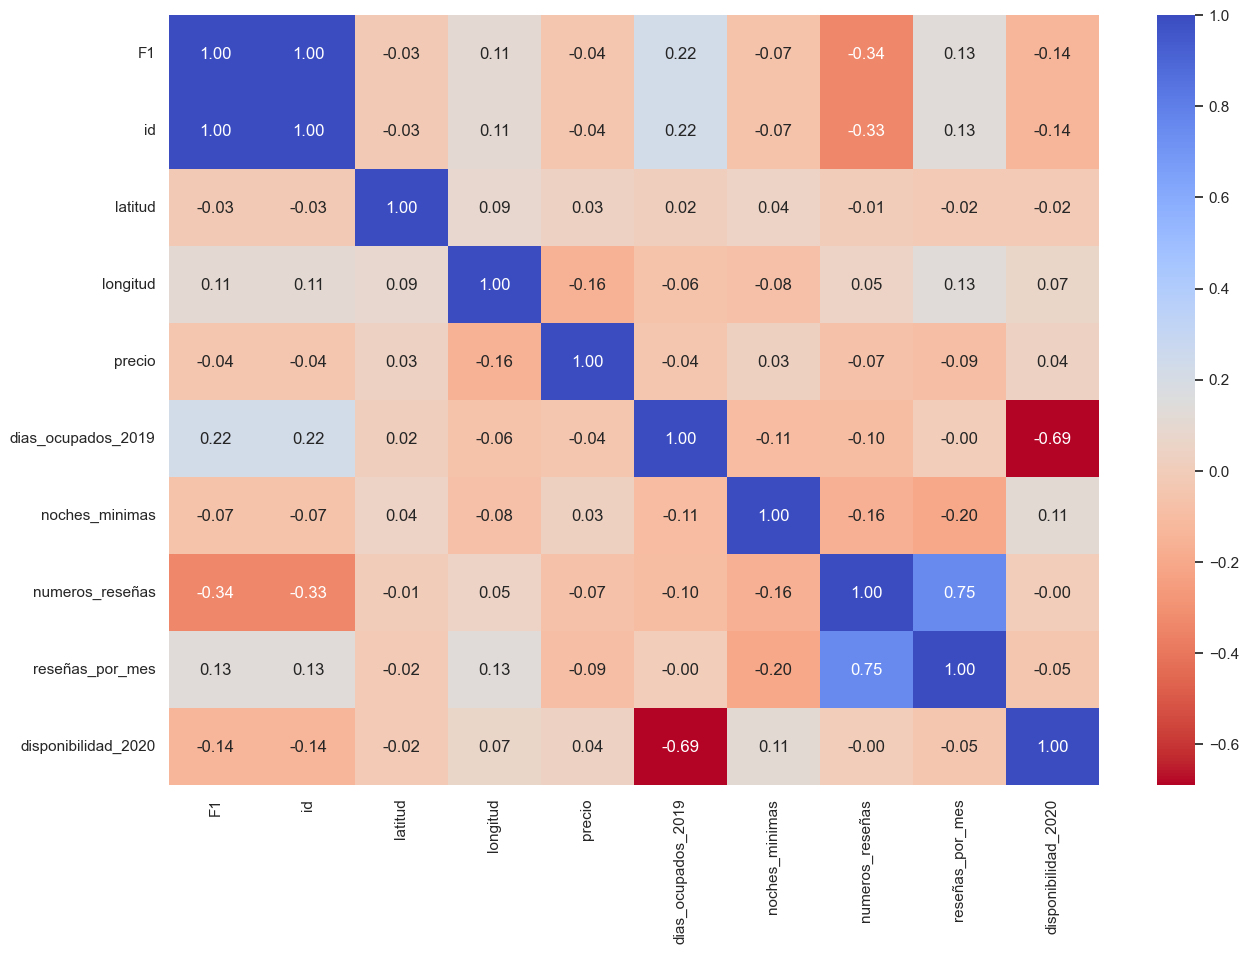

In [9]:
correlacion = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacion, annot=True , fmt='.2f' , cmap=plt.cm.coolwarm_r)
plt.show()

**Observación**
* Las "unicas" variables que estan altamente correlacionadas con un **%75** son: **Las reseñas por mes y Numeros de reseñas**.
* Luego se puede observar que los **Dias ocupados en 2019** tiene una baja correlacion con el **ID** del lugar. solamente un **%22.** 
* Tambien vemos que **Reseñas por mes y ID** tiene una correlacion baja de **%13.** Lo mismo pasa con la **Longitud y Reseñas por mes.**
* Esto siver para ver que variables podremos usar para nuestros modelos predictorios

-----
# Crearemos una variable dummi para los barrios (pasarlos a valores numericos).

In [10]:
barrios_dummy = pd.get_dummies(data["barrio"], prefix="barrio")
barrios_dummy.head()

,barrio_Allerton,barrio_Alphabet City,barrio_Annadale,barrio_Astoria,barrio_Bath Beach,barrio_Battery Park City,barrio_Bay Ridge,barrio_Baychester,barrio_Bayside,barrio_Bedford Park,...,barrio_West Village,barrio_Westchester Village,barrio_Westerleigh,barrio_Whitestone,barrio_Williamsbridge,barrio_Williamsburg,barrio_Windsor Terrace,barrio_Woodhaven,barrio_Woodlawn,barrio_Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Crearemos también una variable dummi para los 4 tipos distintos de habitación.
----


In [11]:
habitaciones_dummy = pd.get_dummies(data["tipo_habitacion"] , prefix="habitacion")
habitaciones_dummy.head()

#ahora lo concatenaremos a al dataset original

data_habitacion_dummy = pd.concat([data,habitaciones_dummy], axis=1)
data_habitacion_dummy = data_habitacion_dummy.drop(["tipo_habitacion"], axis=1)
data_habitacion_dummy.head()

,F1,id,barrio,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020,habitacion_Entire home/apt,habitacion_Hotel room,habitacion_Private room,habitacion_Shared room
0,0,2595,Midtown,40.75362,-73.98377,225,15,10,48,0.39,1,1,0,0,0
1,1,3831,Brooklyn,40.68514,-73.95976,89,188,1,295,4.67,1,1,0,0,0
2,2,5099,Manhattan,40.74767,-73.97500,200,362,3,78,0.60,19,1,0,0,0
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,60,0,29,49,0.38,365,0,0,1,0
4,4,5178,Manhattan,40.76489,-73.98493,79,141,2,454,3.52,242,0,0,1,0


In [12]:
data_habitacion_dummy.rename(columns={"habitacion_Entire home/apt":"habitacion_entire_home/apt",
                                      "habitacion_Hotel room":"habitacion_hotel_room",
                                      "habitacion_Private room":"habitacion_private_room",
                                      "habitacion_Shared room":"habitacion_shared_room",})
data_habitacion_dummy.head()

,F1,id,barrio,latitud,longitud,precio,dias_ocupados_2019,noches_minimas,numeros_reseñas,reseñas_por_mes,disponibilidad_2020,habitacion_Entire home/apt,habitacion_Hotel room,habitacion_Private room,habitacion_Shared room
0,0,2595,Midtown,40.75362,-73.98377,225,15,10,48,0.39,1,1,0,0,0
1,1,3831,Brooklyn,40.68514,-73.95976,89,188,1,295,4.67,1,1,0,0,0
2,2,5099,Manhattan,40.74767,-73.97500,200,362,3,78,0.60,19,1,0,0,0
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,60,0,29,49,0.38,365,0,0,1,0
4,4,5178,Manhattan,40.76489,-73.98493,79,141,2,454,3.52,242,0,0,1,0


----
# Hacemos la misma limpieza de datos y el mismo analisis exploratorio.
-----
# Lo que haremos ahora es usar una red neuronal, 
* ## Normalizaremos los datos obtenidos, dividir el modelo en entrenamiento y testeo, crear el modelo para asi ponerlo a entrenar y ver como se comporta para definir si es un modelo apto para predecir.

* ## En este usaremos las variables que tienen correlación positiva y sus tipos de habitaciones.

In [13]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [22]:
X = data_habitacion_dummy[["latitud","noches_minimas","disponibilidad_2020","habitacion_Entire home/apt","habitacion_Hotel room",
                           "habitacion_Private room","habitacion_Shared room"]]
Y = data_habitacion_dummy["precio"]

In [23]:
# Normalizamo los datos.
X_norm = (X- X.mean() / X.std())

In [24]:
#Separamos en modelos de entrenamiento y test
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y , test_size=0.3 , random_state=42)

In [25]:
#Creamos el modelo, con sus respectivas densidad
modelo = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[7]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [26]:
#Entrenamos el modelo
modelo.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001) , loss='mse' , metrics=['mae'])
history = modelo.fit(X_train , Y_train , epochs=300 , validation_split=0.2 ,verbose=0)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [27]:
y_pred = modelo.predict(X_test).flatten()

166/166 [==============================] - 0s 2ms/step


In [28]:
print('Coeficiente de determinación (R2) es de:', r2_score(Y_test, y_pred))
print('Error cuadrático medio (MSE) es de :',mean_squared_error(Y_test , y_pred))
print('Eror absoluto medio (MAE) es de:', mean_absolute_error(Y_test, y_pred))

Coeficiente de determinación (R2) es de: 0.1126737246180074
Error cuadrático medio (MSE) es de : 26271.944685278562
Eror absoluto medio (MAE) es de: 64.11147946129459


* ## Observación.
* ### Vemos que el modelo con la red neuronal sigue teniendo los mismo problemas de eficacia, lo que haremos ahora es agregar algunos datos e intentar con otro tipo de red neuronal mas compleja. cambiando optimizador y agregandole mas o menos tipos de capas.

* ### como ya lo explicamos lo que es el MAE y el MSE lo volveremos a explicar aqui:
* #### El MAE es una medida que se utiliza para entender cuán equivocados son los valores que predice un modelo de regresión con respecto a los valores reales. Un MAE de 61.32 indica que en promedio, las predicciones del modelo difieren en alrededor de 61.32 unidades de la verdad de los datos

* #### El MSE mide el promedio de los cuadrados de los errores entre las predicciones y los valores reales. En este caso, el valor del MSE de 30390.2331 indica que el modelo tiene un error cuadrático promedio de aproximadamente 27109.699 en las predicciones.
----
---

* ## Vamos a intentar como se comporta la red neuronal con todos los datos y no solamente con los que tienen correlación y sus dichos tipos de habitaciones.
* ## Luego agregaremos el dataset de las habitaciones dummificadas para ver como se comporta también y vemos alguna mejora del modelo.

In [ ]:
X = data_habitacion_dummy[["latitud","noches_minimas","dias_ocupados_2019","noches_minimas","numeros_reseñas","reseñas_por_mes",
                           "disponibilidad_2020","habitacion_Entire home/apt","habitacion_Hotel room",
                           "habitacion_Private room","habitacion_Shared room"]]
Y = data_habitacion_dummy["precio"]

In [ ]:
X_norm = (X- X.mean() / X.std())

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y , test_size=0.3 , random_state=42)

In [ ]:
modelo1 = keras.Sequential([
    keras.layers.Dense(65, activation='relu', input_shape=[11]),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
#Entrenamos el modelo
modelo1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mse' , metrics=['mae'])
history1 = modelo1.fit(X_train , Y_train , epochs=500 , validation_split=0.2 ,verbose=0)

In [ ]:
y_pred1 = modelo1.predict(X_test).flatten()

In [ ]:
print('Coeficiente de determinación (R2) es de:', r2_score(Y_test, y_pred1))
print('Error cuadrático medio (MSE) es de :',mean_squared_error(Y_test , y_pred1))
print('Eror absoluto medio (MAE) es de:', mean_absolute_error(Y_test, y_pred1))

* ## Obtuvimos casi el mismo resultado usando todas las variables predictoras, solamente aumento un poco mas.

------
* ### Ahora Entrenamiento del modelo con las variables dumificadas sobre los tipos de habitaciones.utilizando el optimizador 'ADAM'

In [ ]:
#Agregamos las variables dummies y luego haremos un entrenamiento con el optimizado "adam" y luego con el "rmsprop"
X = data_habitacion_dummy[["latitud","noches_minimas","dias_ocupados_2019","noches_minimas","numeros_reseñas",
                           "reseñas_por_mes","disponibilidad_2020","habitacion_Entire home/apt","habitacion_Hotel room",
                           "habitacion_Private room","habitacion_Shared room"]]
Y = data_habitacion_dummy["precio"]

In [ ]:
X_norm = (X- X.mean() / X.std())

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y , test_size=0.3 , random_state=42)

In [ ]:
modelo11 = keras.Sequential([
    keras.layers.Dense(65, activation='relu', input_shape=[11]),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(65, activation='relu'),
    keras.layers.Dense(42, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
modelo11.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse' , metrics=['mae'])
history11 = modelo11.fit(X_train , Y_train , epochs=500 , validation_split=0.2 ,verbose=0)

In [ ]:
y_pred11 = modelo11.predict(X_test).flatten()

In [ ]:
print('Coeficiente de determinación (R2) es de:', r2_score(Y_test, y_pred11))
print('Error cuadrático medio (MSE) es de :',mean_squared_error(Y_test , y_pred11))
print('Eror absoluto medio (MAE) es de:', mean_absolute_error(Y_test, y_pred11))

* ### Haremos una con el 'ADAM' de las 11 variables que tenemos para predecir

In [14]:
#Agregamos las variables dummies y luego haremos un entrenamiento con el optimizado "adam" y luego con el "rmsprop"
X = data_habitacion_dummy[["latitud","noches_minimas","dias_ocupados_2019","noches_minimas","numeros_reseñas",
                           "reseñas_por_mes","disponibilidad_2020","habitacion_Entire home/apt","habitacion_Hotel room",
                           "habitacion_Private room","habitacion_Shared room"]]
Y = data_habitacion_dummy["precio"]

In [15]:
X_norm = (X- X.mean() / X.std())

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(X_norm , Y , test_size=0.25 , random_state=42)

In [17]:
modelo11r = keras.Sequential([
    keras.layers.Dense(95, activation='relu', input_shape=[11]),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(95, activation='relu'),
    keras.layers.Dense(1)
])

In [18]:
#Ahora haremos una con el optimizador rmsprop
modelo11r.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001) , loss='mse' , metrics=['mae'])
history11r = modelo11r.fit(X_train , Y_train , epochs=700 , validation_split=0.2 ,verbose=0)

C:\Users\Acer\anaconda3\envs\Trabajar-con-tensorflow\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


In [20]:
y_pred11r = modelo11r.predict(X_test).flatten()

138/138 [==============================] - 0s 2ms/step


In [21]:
print('Coeficiente de determinación (R2) es de:', r2_score(Y_test, y_pred11r))
print('Error cuadrático medio (MSE) es de :',mean_squared_error(Y_test , y_pred11r))
print('Eror absoluto medio (MAE) es de:', mean_absolute_error(Y_test, y_pred11r))

Coeficiente de determinación (R2) es de: 0.1522193739443406
Error cuadrático medio (MSE) es de : 25232.737868130247
Eror absoluto medio (MAE) es de: 66.40869392512822


* # Resumen de las redes neuronales creadas para la prediccion de alquileres en NY.
* ## Vemos que el mae mas bajo que obtuvimos es de 61.35 (el mas alto fue alrededor de 88.50) 
* ## Utilizamos el optimizador "adam" y el "rmsprop". el que mejor fue la prediccion de todas es con el "adam" y todas las variables predictoras posibles.

* ### Lo que voy a hacer es lo siguiente: Intentar de agregar o quitar algunos parametros de la capda o otro tipos de neuronas.
* ### luego también tengo que entrenar mas a fondo el modelo, con el testing y train pára luego hacer una validación cruzada para cada modelo y darle un resultado final a cada uno.
* ### lo que voy a hacer es subir por ahora este ejemplo que hice con las redes neuronal, luego mañana y pasado crear un red neuronal recurrente para ver como también se comporta el modelo y darle un resumen final de como queda el modelo y como preice.Desde ya muchas gracias si prestas atención a mis trabajos que voy subiendo
* ### También dejo preparado los valores precios a categoricos para ver com.o se comportan y si puedo hacer una mejor predicción
------
* ### Vamos a hacer una validación cruzada para ver como se comporta el modelo. tanto para las variables con mas correlacion y para las variables que se encuentren todas.

* ## Observación
* ### Al tener muchos tipos de valores "precios" lo que haremos para usar el arbol de decisión es pasar los valores numericos a valores categoricos. Es decir separar de a grupos de precios. pueden ser bastantes grupos pero seria lo mas "acorde" para poder usar el árbol de decisión y asi ver seguramente una eficacia muchisima mas alta de la que venimos teniendo.
------

In [ ]:
#Pasamos las variables precio que son numericas a variables categoricas.
data_arbol_decision.loc[data["precio"]<=50, "precio"] = "0-50usd"
data_arbol_decision.loc[(data["precio"]>50)&(data["precio"]<=75),"precio"] = "50-75usd"
data_arbol_decision.loc[(data["precio"]>75)&(data["precio"]<=100),"precio"] = "75-100usd"
data_arbol_decision.loc[(data["precio"]>100)&(data["precio"]<=125),"precio"] = "100-125usd"
data_arbol_decision.loc[(data["precio"]>125)&(data["precio"]<=150),"precio"] = "125-150usd"
data_arbol_decision.loc[(data["precio"]>150)&(data["precio"]<=175),"precio"] = "150-175usd"
data_arbol_decision.loc[(data["precio"]>175)&(data["precio"]<=200),"precio"] = "175-200usd"
data_arbol_decision.loc[(data["precio"]>200)&(data["precio"]<=225),"precio"] = "200-225usd"
data_arbol_decision.loc[(data["precio"]>225)&(data["precio"]<=250),"precio"] = "225-250usd"
data_arbol_decision.loc[(data["precio"]>250)&(data["precio"]<=275),"precio"] = "250-275usd"
data_arbol_decision.loc[(data["precio"]>275)&(data["precio"]<=300),"precio"] = "275-300usd"
data_arbol_decision.loc[(data["precio"]>300)&(data["precio"]<=325),"precio"] = "300-325usd"
data_arbol_decision.loc[(data["precio"]>325)&(data["precio"]<=350),"precio"] = "325-350usd"
data_arbol_decision.loc[(data["precio"]>350)&(data["precio"]<=375),"precio"] = "350-375usd"
data_arbol_decision.loc[(data["precio"]>375)&(data["precio"]<=400),"precio"] = "375-400usd"
data_arbol_decision.loc[(data["precio"]>400)&(data["precio"]<=450),"precio"] = "400-450usd"
data_arbol_decision.loc[(data["precio"]>450)&(data["precio"]<=500),"precio"] = "450-500usd"
data_arbol_decision.loc[(data["precio"]>500)&(data["precio"]<=550),"precio"] = "500-550usd"
data_arbol_decision.loc[(data["precio"]>550)&(data["precio"]<=600),"precio"] = "550-600usd"
data_arbol_decision.loc[(data["precio"]>600)&(data["precio"]<=650),"precio"] = "600-650usd"
data_arbol_decision.loc[(data["precio"]>650)&(data["precio"]<=700),"precio"] = "650-700usd"
data_arbol_decision.loc[(data["precio"]>700)&(data["precio"]<=750),"precio"] = "700-750usd"
data_arbol_decision.loc[(data["precio"]>750)&(data["precio"]<=800),"precio"] = "750-800usd"
data_arbol_decision.loc[(data["precio"]>800)&(data["precio"]<=850),"precio"] = "800-850usd"
data_arbol_decision.loc[(data["precio"]>850)&(data["precio"]<=900),"precio"] = "850-900usd"
data_arbol_decision.loc[(data["precio"]>850)&(data["precio"]<=900),"precio"] = "850-900usd"
data_arbol_decision.loc[(data["precio"]>900)&(data["precio"]<=950),"precio"] = "900-950usd"
data_arbol_decision.loc[(data["precio"]>950)&(data["precio"]<=1000),"precio"] = "950-1000usd"

data_arbol_decision.loc[(data["precio"]>1000)&(data["precio"]<=2000),"precio"] = "1000-2000usd"
data_arbol_decision.loc[(data["precio"]>2000)&(data["precio"]<=3000),"precio"] = "2000-3000usd"
data_arbol_decision.loc[(data["precio"]>3000)&(data["precio"]<=4000),"precio"] = "3000-4000usd"
data_arbol_decision.loc[(data["precio"]>4000)&(data["precio"]<=5000),"precio"] = "4000-5000usd"

data_arbol_decision.loc[(data["precio"]>5000)&(data["precio"]<=7000),"precio"] = "5000-7000usd"
data_arbol_decision.loc[(data["precio"]>7000)&(data["precio"]<=9999),"precio"] = "7000-9999usd"